| Assignment 1 contribution table   | Andreas Holm Matthiassen (s234838) | Hector Helt Jakobsen (s234822) | Teis Aggerholm (s234822) |
|-------------|---------|---------|---------|
| Part 1 | 100%     | 0%     | 0%     |
| Part 2 | 0%     | 100%     | 0%     |
| Part 3 | 0%     | 0%     | 100%     |

Link to our GitHub repository: `https://github.com/Andreas-Holm-2/02467-Assignment-2`

# `Part 1:` Properties of the real-world network of Computational Social Scientists


Exercise: Analyzing Networks through a Random Model
1. _Random Network_: Let's start by building a Random Network, acting as a baseline (or [\"null model\"](https://en.wikipedia.org/wiki/Null_model)) to understand the Computational Social Scientists Network better.

* First, calculate the probability (_p_) that makes the expected number of edges in our random network match the actual edge count in the Computational Social Scientists network. Refer to equation 3.2 in your Network Science textbook for guidance. After finding _p_, figure out the average degree (using the given formula).

In [1]:
N = 17833 # Total Nodes (authors) found in the week 4 exercises
L = 58544 # Total links (collaborations) found in the week 4 exercises

From the Network Science textbook, we have

$$
\langle L\rangle=\sum_{\mathrm{L}=0}^{\frac{\mathrm{N}(\mathrm{~N}-1)}{2}} \mathrm{Lp}_{\mathrm{L}}=\mathrm{p} \frac{\mathrm{~N}(\mathrm{~N}-1)}{2} \quad (3.2)
$$

Using this equation, we can derive a formula to calculate the probability (p) that makes the expected number of edges in our random network match the actual edge count in the Computational Social Scientists network

$$
\langle L\rangle = p \frac{N(N-1)}{2} \Leftrightarrow \frac {\langle L\rangle} {\frac{N(N-1)}{2}} = p \Leftrightarrow \frac {2 \langle L\rangle} {N(N-1)} = p
$$

In [2]:
p = 2 * L / (N * (N-1))
p

0.0003682035087661039

Thus, $p \approx 0.00037$. This ensures expected number of edges in our random network match the actual edge count in the Computational Social Scientists network.


Now we use this p to calculate the expected average degree $\langle\mathrm{k}\rangle$:

$$
\langle\mathrm{k}\rangle=\frac{2\langle\mathrm{L}\rangle}{\mathrm{N}}=\mathrm{p}(\mathrm{~N}-1)
$$

In [3]:
avg_degree = p * (N-1)
avg_degree

6.565804968317165

The average degree is $\approx 6.57$

* Now, write a function to generate a Random Network that mirrors the Computational Social Scientists network in terms of node count, using your calculated _p_. Generate a random network by linking nodes in every possible pair with probability _p_. **Hint**: you can use the function [``np.random.uniform``](https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html) to draw samples from a uniform probability distribution.

In [ ]:
import networkx as nx
import numpy as np

def generate_random_network(N, p):

    G = nx.Graph()
    G.add_nodes_from(range(N))

    for i in range(N):
        for j in range(i + 1, N):
            if np.random.uniform(0, 1) < p:
                G.add_edge(i, j)

    return G

N = 17833 
L = 58544  
p = (2 * L) / (N * (N - 1))  

random_network = generate_random_network(N, p)
print(random_network) # security check


Graph with 17833 nodes and 58333 edges


In [ ]:
import ast
from collections import defaultdict
import pandas as pd

def generate_coauthorship_network():
    authors_df = pd.read_csv("final_authors.csv")
    papers_df = pd.read_csv("final_paperdata.csv")


    coauthor_counts = defaultdict(int)

    all_author_ids = set()
    for author_list in papers_df['author_ids'].dropna():
        authors = ast.literal_eval(author_list)
        all_author_ids.update(authors)

        
        for i in range(len(authors)):
            for j in range(i + 1, len(authors)):
                coauthor_counts[(authors[i], authors[j])] += 1

    weighted_edgelist = [(a, b, w) for (a, b), w in coauthor_counts.items()]

    weighted_edgelist[:5]


    G = nx.Graph()
    G.add_nodes_from(all_author_ids)
    G.add_weighted_edges_from(weighted_edgelist)

    return G

coauthorship_network = generate_coauthorship_network()
print(coauthorship_network) # security check

Graph with 17833 nodes and 58544 edges


* Visualize the network as you did for the Computational Social Scientists network in the exercise above (my version is below).

In [ ]:
import netwulf
'''
We use the Netwulf library created by Ulf Aslak and Ben Maier for visualizing the two networks.

Please not the visualzation settings are completely the same for both network with the only exception being
the node color (for easier distinction).

'''

In [107]:
netwulf.visualize(random_network)
'Random network'

'Random network'

![Random network.png](<attachment:Random network.png>)
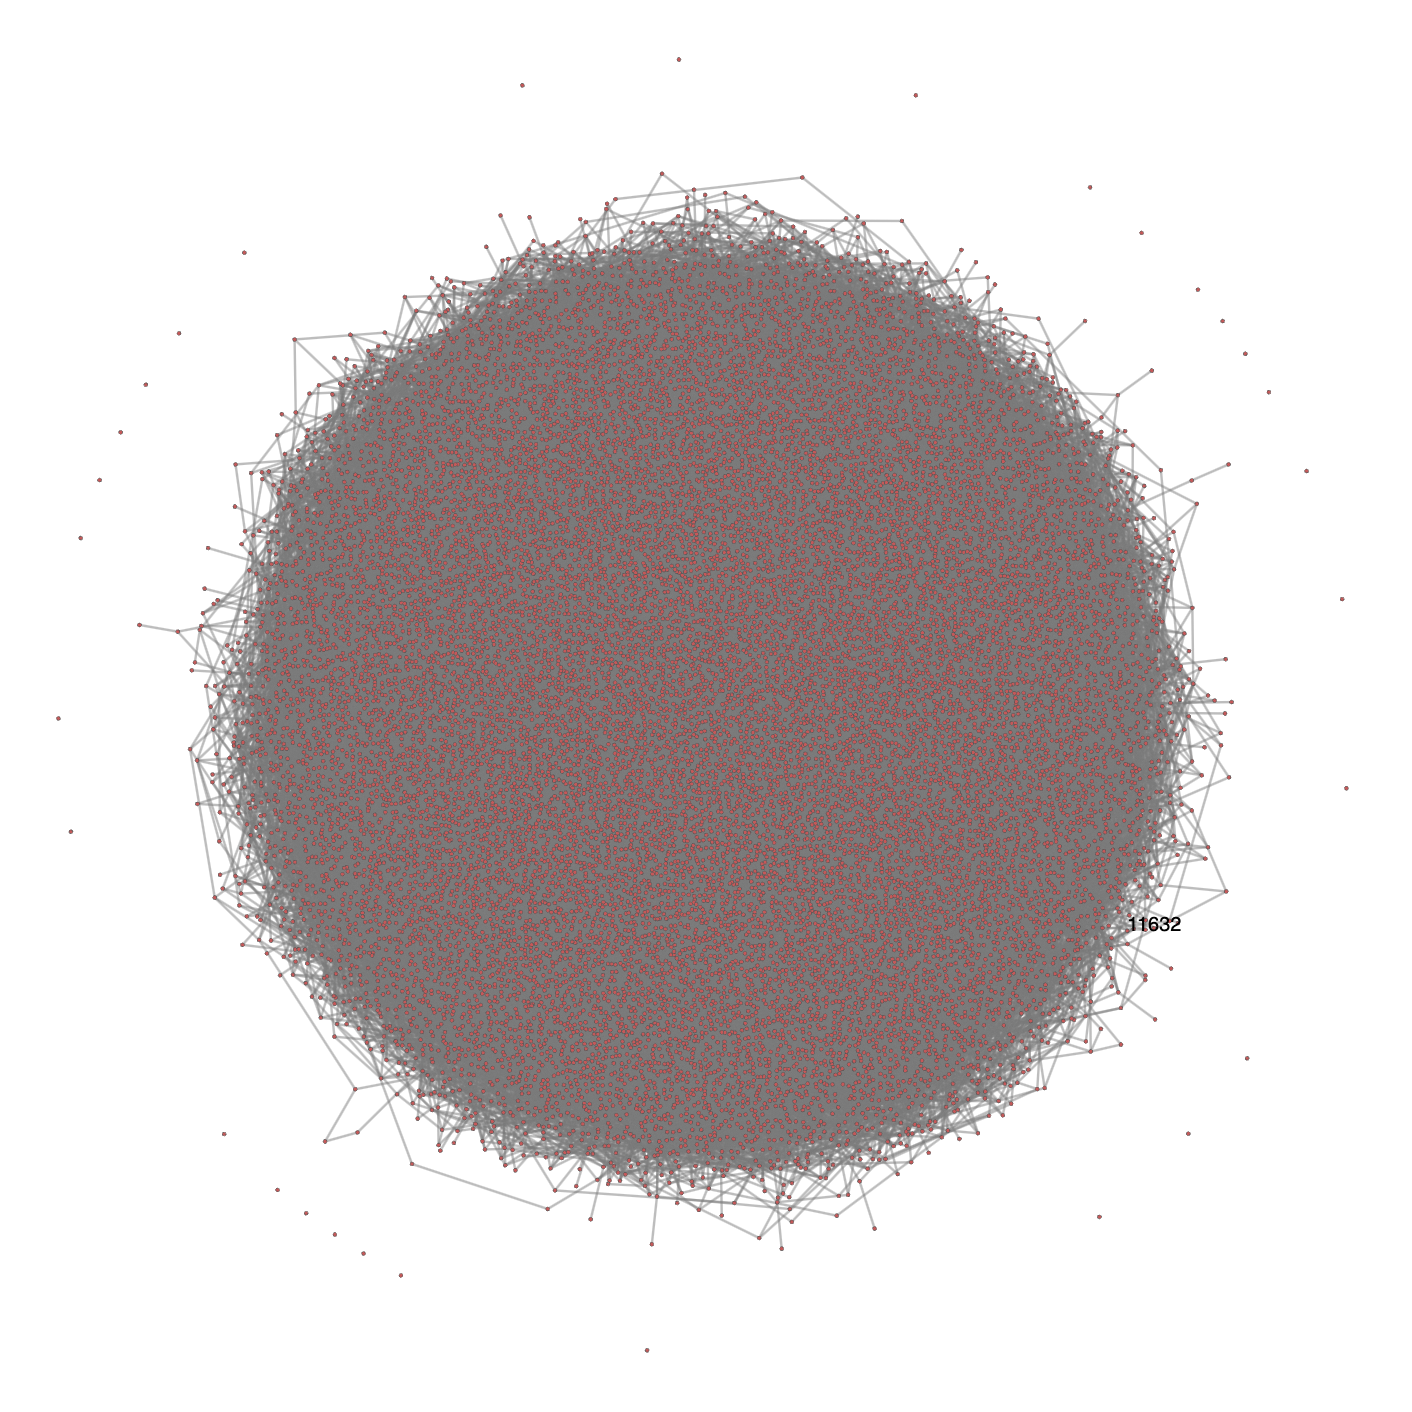

In [105]:
netwulf.visualize(coauthorship_network)
'Computational Social Scientists network'

'Computational Social Scientists network'

![Computational Social Scientists network.png](<attachment:Computational Social Scientists network.png>)
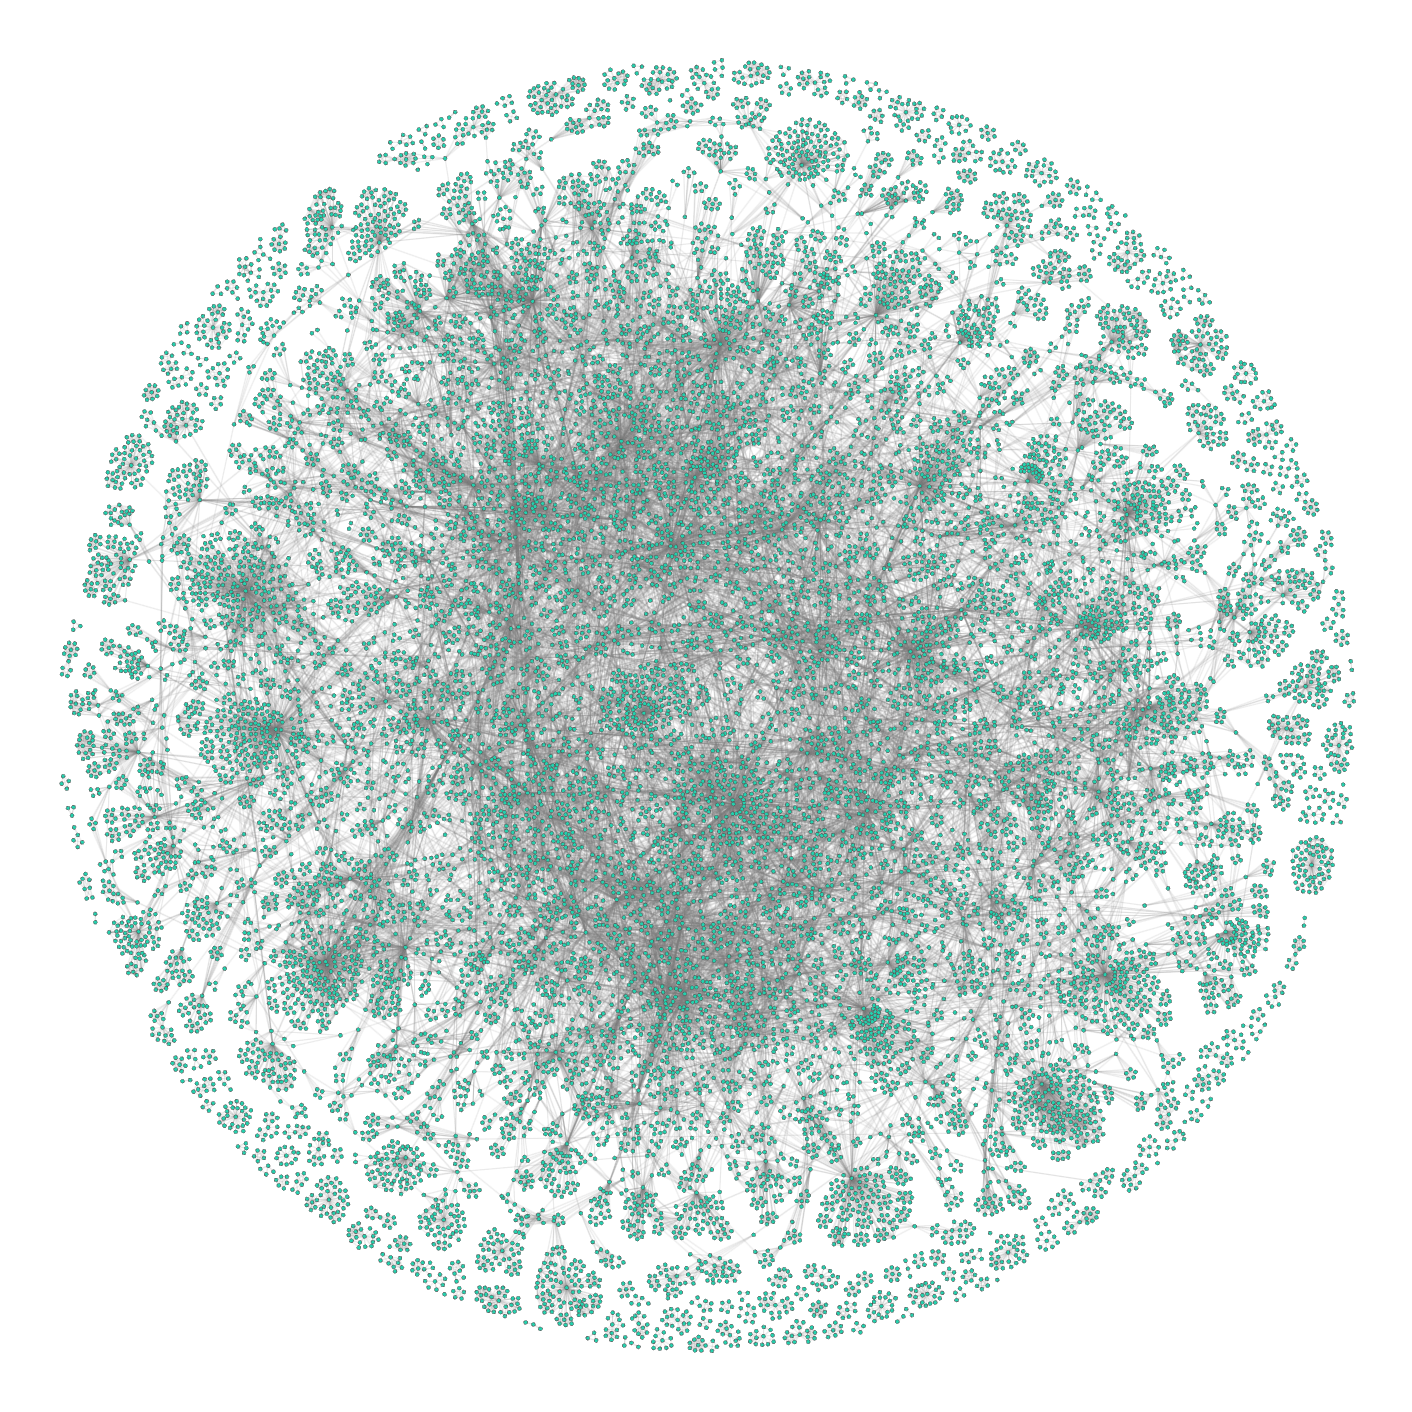

![Network comparison.jpg](<attachment:Network comparison.jpg>)
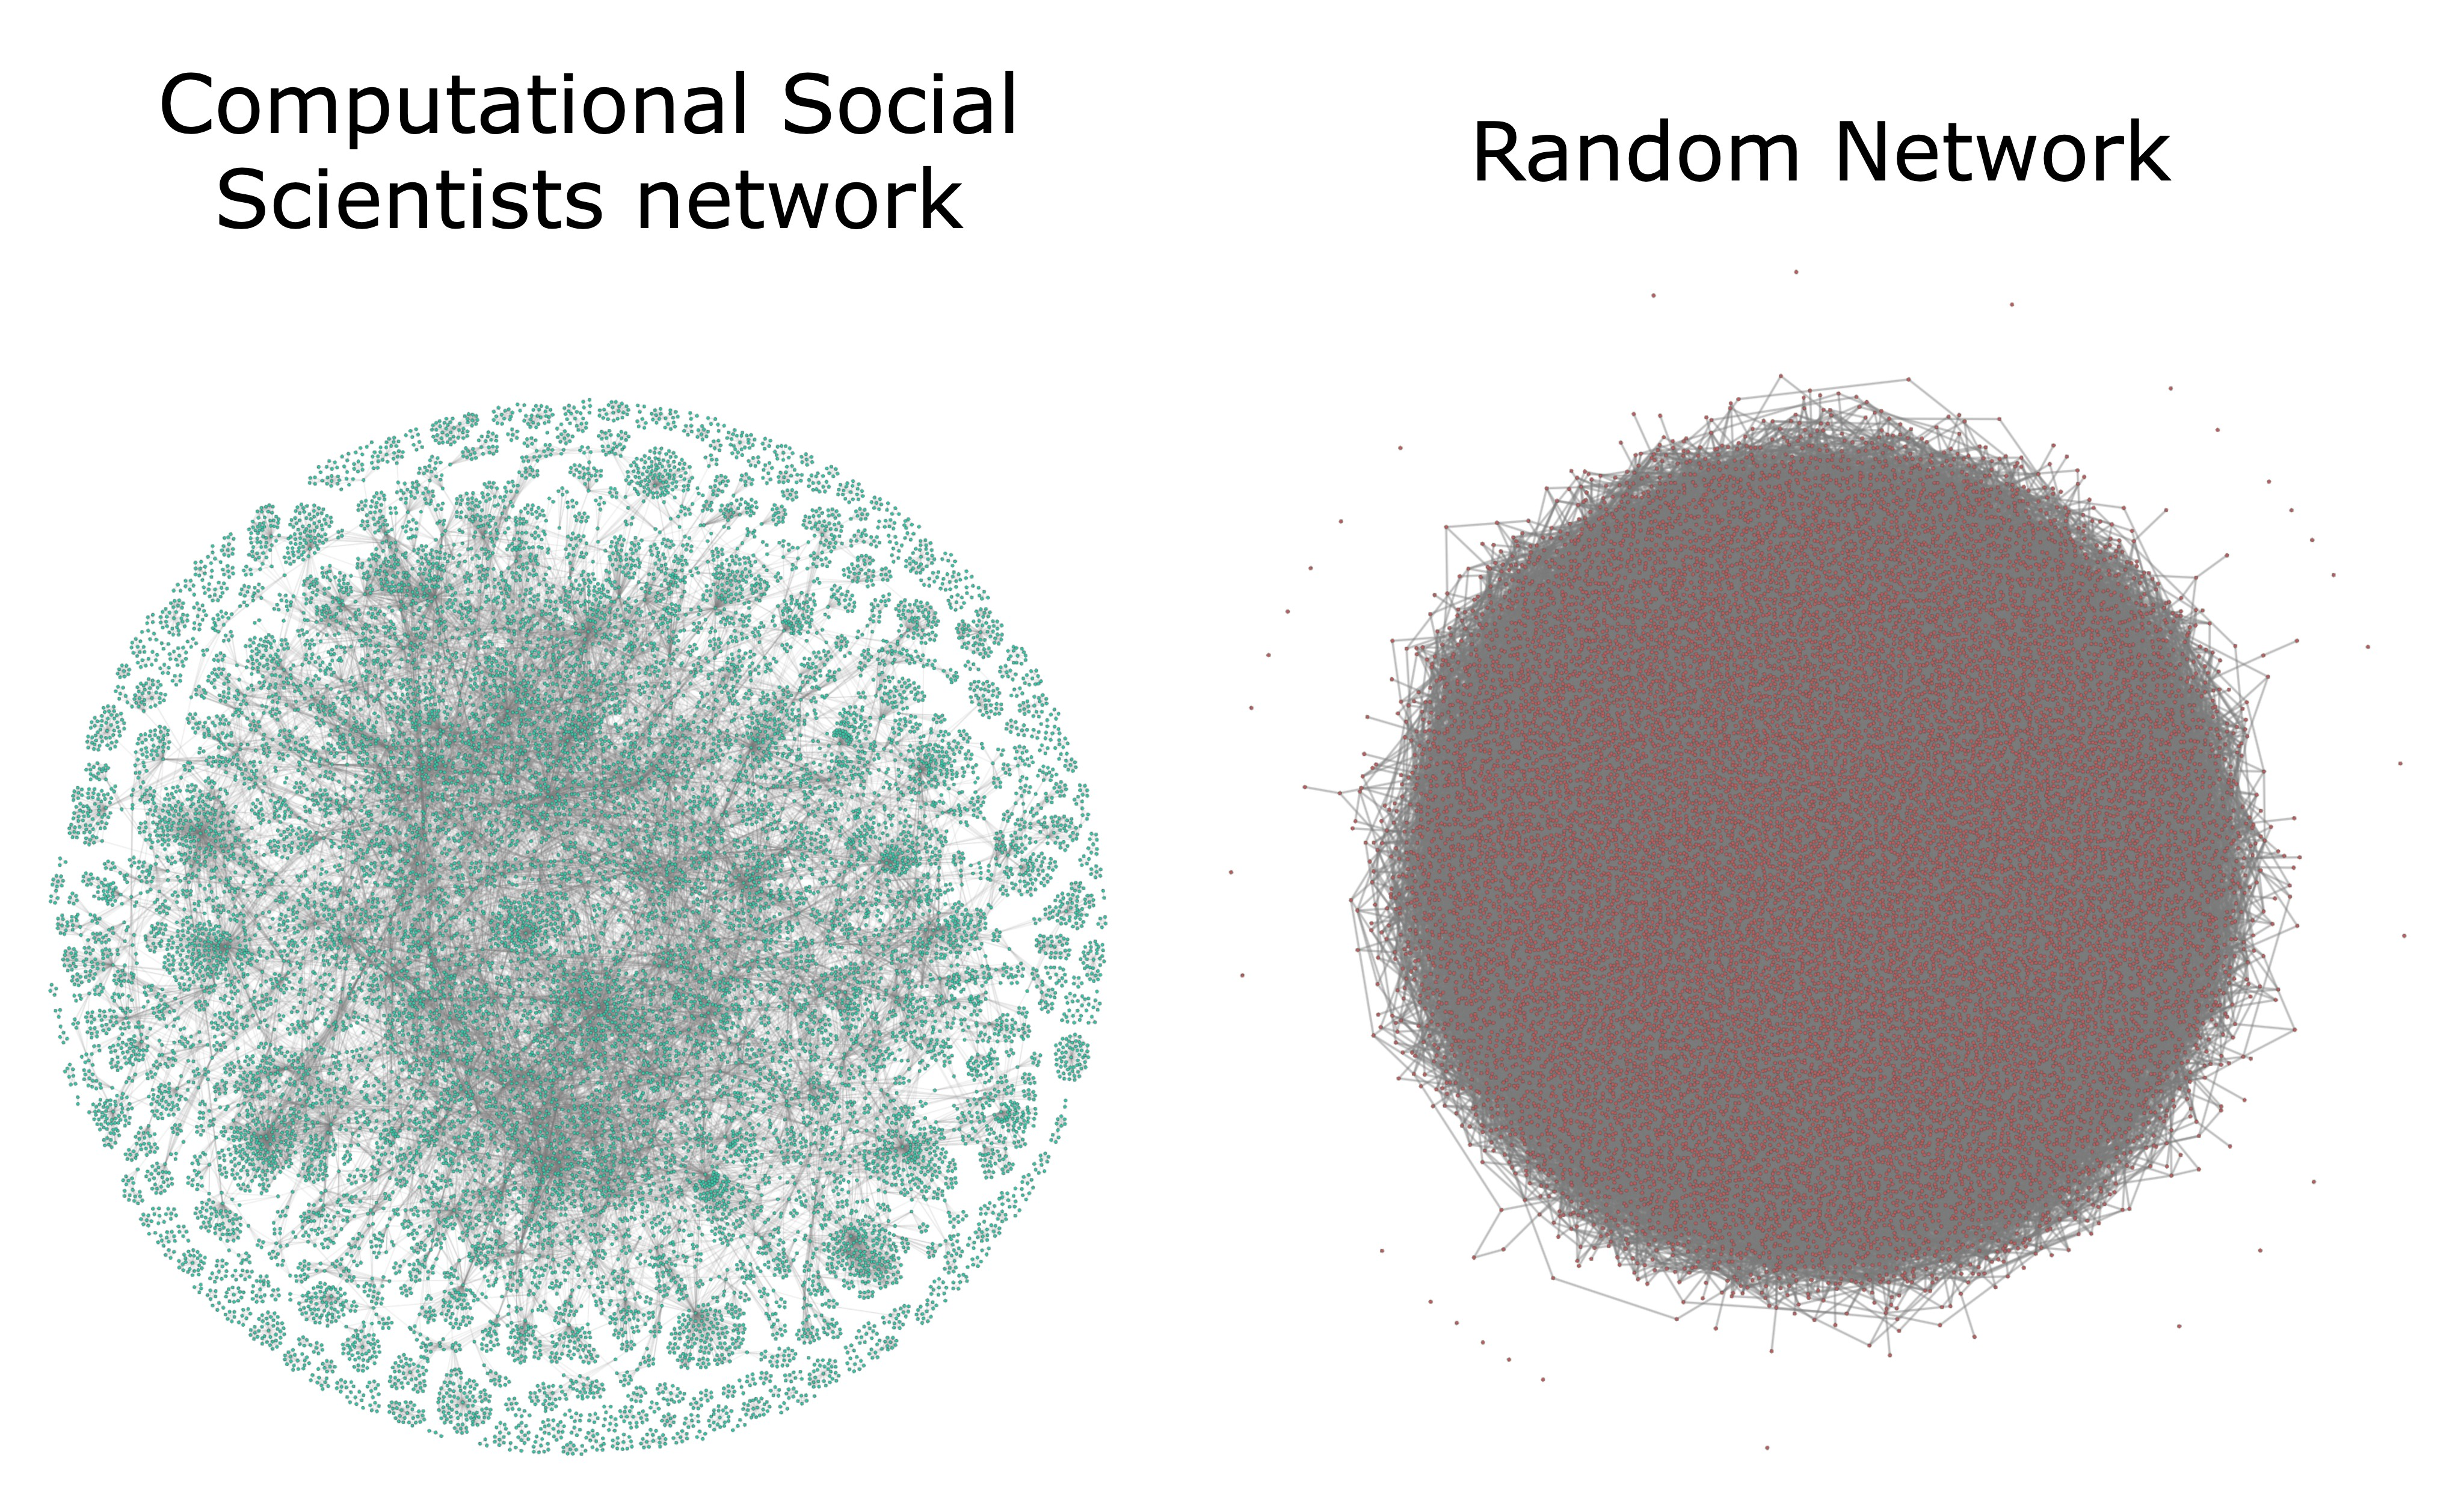

Both networks have been visualized using the Netwolf library and are displayed above.

In addition to these visualizations, degree distributions are visualized as well.

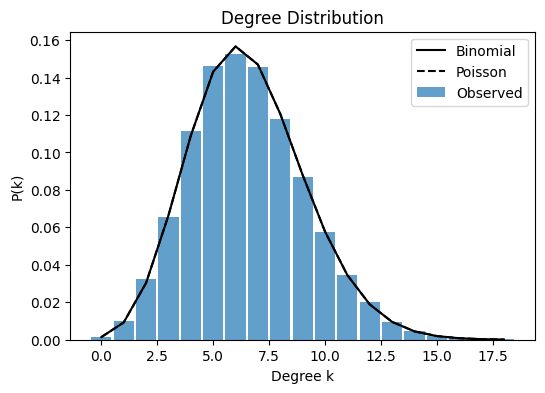

In [109]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, poisson

def plot_degree_distribution(G, N, p):
    degrees = [d for n, d in G.degree()]
    hist, bins = np.histogram(degrees, bins=range(max(degrees)+2), density=True)

    plt.figure(figsize=(6, 4))
    plt.bar(bins[:-1], hist, width=0.9, alpha=0.7, label="Observed")
    
    # Binomial distribution
    k = np.arange(0, max(degrees) + 1)
    binom_dist = binom.pmf(k, N-1, p)
    plt.plot(k, binom_dist, 'k-', label="Binomial")
    
    # Poisson approximation
    lambda_ = p * (N - 1)
    poisson_dist = poisson.pmf(k, lambda_)
    plt.plot(k, poisson_dist, 'k--', label="Poisson")
    
    plt.xlabel("Degree k")
    plt.ylabel("P(k)")
    plt.legend()
    plt.title("Degree Distribution")
    plt.show()

plot_degree_distribution(random_network, N, p)


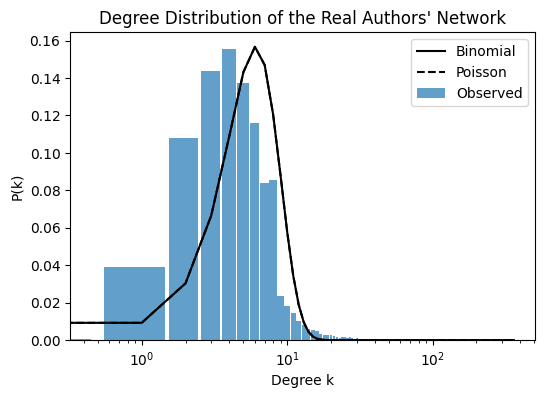

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy.stats import binom, poisson

def plot_degree_distribution(G):
    degrees = [d for n, d in G.degree()]
    hist, bins = np.histogram(degrees, bins=range(max(degrees) + 2), density=True)
    
    plt.figure(figsize=(6, 4))
    plt.bar(bins[:-1], hist, width=0.9, alpha=0.7, label="Observed")
    
    N = G.number_of_nodes()
    L = G.number_of_edges()
    p = (2 * L) / (N * (N - 1)) 
    
    k = np.arange(0, max(degrees) + 1)
    binom_dist = binom.pmf(k, N-1, p)
    poisson_dist = poisson.pmf(k, p * (N - 1))
    
    plt.plot(k, binom_dist, 'k-', label="Binomial")
    plt.plot(k, poisson_dist, 'k--', label="Poisson")
    
    plt.xlabel("Degree k")
    plt.ylabel("P(k)")
    plt.xscale('log')
    plt.legend()
    plt.title("Degree Distribution of the Real Authors' Network")
    plt.show()


plot_degree_distribution(coauthorship_network)


* Answer the following questions __(max 200 words in total)__:

$\quad$ - What regime does your random network fall into? Is it above or below the critical threshold?

First, we calculate the average degree of a node in the network $\langle k\rangle$:

$$\langle k\rangle=\frac{2 \times 58544}{17833} \approx 6.57$$

Since $\langle k\rangle>1$, the network falls into the supercritical regime, and our network is above the critical threshold. In this regime, a giant component should emerge that contains a finite fraction of all nodes.

$\quad$ - According to the textbook, what does the network's structure resemble in this regime?

In this regime, a giant component forms, containing a significant fraction of all nodes. While most nodes are connected, some isolated nodes and small components still exist.

Since $\ln 17833 \approx 9.79$ and $\langle k\rangle<\ln N$, the network is not fully connected-meaning that although a dominant cluster is present, some nodes remain in disconnected components.


$\quad$ - Based on your visualizations, identify the key differences between the actual and the random networks. Explain whether these differences are consistent with theoretical expectations.

Based on the network visualizations, the random network appear to show a much more even distribution of links at each node. This makes sense, as every node had the same prabability of genereating an edge to another node, wheereas in the coauthorship network, the number of links at each node is varying a lot more, thus leading to a graph that appears to be more populated in the center, and additionally, it seems to exhibit clear patterns and less randomness. This can be futher supported by the degree distribution plot, where for the random network, it likely follows a binomial distrubution, and for the coauthorship, it appearch much more heaye tailed.


2. _Shortest Paths_: Here, we will check if the Computational Social Scientists Network exhibits characteristics of a small-world network by analyzing its shortest paths.


Begin by identifying the largest connected component within the Computational Social Scientists network. Recall that a connected component is a subset of nodes in which every pair of nodes is connected by a path. For a refresher on connected components, see section 2.9 of the Network Science book. Follow these steps:


- Utilize [``nx.algorithms.connected_components``](https://networkx.org/documentation/stable//reference/algorithms/generated/networkx.algorithms.components.connected_components.html) to enumerate all connected components, which will be returned as a list of node subsets.

In [88]:
connected_components = list(nx.connected_components(coauthorship_network))

The connected components are returned as a list of node subsets. Some key statistics are printed for control:

In [91]:
print(f'Number of components within the Computational Social Scientists network: {len(connected_components)}')
size_list = [len(component) for component in connected_components]
sorted_size_decending = sorted(size_list,reverse=True)
print(f'Sizes of each component (decending by size): {sorted_size_decending}')

Number of components within the Computational Social Scientists network: 211
Sizes of each component (decending by size): [15923, 63, 59, 45, 39, 34, 31, 31, 30, 30, 29, 26, 25, 23, 22, 21, 20, 20, 19, 19, 19, 19, 18, 18, 17, 17, 17, 17, 17, 16, 15, 15, 15, 15, 14, 14, 14, 13, 13, 13, 13, 13, 13, 13, 13, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1]


- Select the largest subset of nodes identified in the previous step. Then, create a subgraph of your original network that includes only these nodes, using [``nx.Graph.subgraph``](https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.subgraph.html). This subset forms your largest connected component, sometimes referred to as the [giant component](https://en.wikipedia.org/wiki/Giant_component).


We extract the largest connected component, which we found to be of size 15923.

In [ ]:
largest_cc = max(connected_components, key=len)

giant_component = coauthorship_network.subgraph(largest_cc).copy()

print(giant_component) # size security check

Graph with 15923 nodes and 53832 edges


* Calculate the average (unweighted) shortest path length within this giant component by employing [``nx.average_shortest_path_length``](https://networkx.org/documentation/networkx-1.3/reference/generated/networkx.average_shortest_path_length.html).


In [110]:
average_shortest_path_length = nx.average_shortest_path_length(giant_component)
print(average_shortest_path_length)

5.950953386612338


The average unweighted shortest path length within the giant component is 5.95

* Perform the same calculation for the giant component of the random network you constructed in the above exercise 1.


In [106]:
connected_components_random= list(nx.connected_components(random_network))

print(f'Number of components within the random network: {len(connected_components_random)}')
size_list = [len(component) for component in connected_components_random]
sorted_size_decending = sorted(size_list,reverse=True)
print(f'Sizes of each component (decending by size): {sorted_size_decending}')



Number of components within the random network: 31
Sizes of each component (decending by size): [17803, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [112]:
largest_cc_random = max(connected_components_random, key=len)

giant_component_random = random_network.subgraph(largest_cc_random).copy()

print(giant_component_random)

Graph with 17803 nodes and 58333 edges


In [113]:
average_shortest_path_length_random = nx.average_shortest_path_length(giant_component_random)
print(average_shortest_path_length_random)

5.420938990986517


The average unweighted shortest path length within the giant component is 5.42 for the random network


* Reflect on how the average shortest path lengths of the real and random networks compare and answer the following questions, supporting your answers with the theory from the book.


- Why do you think I asked you to consider the giant component only?

- Why do you think I asked you to consider unweighted edges?


- Does the Computational Social Scientists network exhibit the small-world phenomenon?

# `Part 2:` Network Analysis in Computational Social Science


# `Part 3:` Words that characterize Computational Social Science communities
